In [ ]:
# 目前為價格區分
# 改用其他因素來分類，看是否比較準確
# value count後先拿筆數最多的建立模型來看有無改善ex. MSZoning：分高密度與低密度
# 或做多個預測模型

## [ STEP 1 ] : Download & import the house_price dataset.

In [5]:
import pandas as pd

url = 'C:/Users/jenny/Downloads/AI/House_Price_Data/house_price.csv'
house_price = pd.read_csv(url)

In [ ]:
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## [ STEP 2 & 3 ] : Exploratory Data Analysis & “label” the target, “SalePrice” data & Data preprocessing & cleansing for the features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 類別轉數值
label_encoders = {}
for column in house_price.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    house_price[column] = le.fit_transform(house_price[column])
    label_encoders[column] = le
    
# price range
house_price['sp1'] = house_price['SalePrice']
sp = house_price['SalePrice']
house_price['sp1'][sp <= 129975.0] = 0     # SalePrice <= 1st Quartile (Q1)
house_price['sp1'][(129975.0 < sp) & (sp <= 163000.0)] = 1 # Q1 < SalePrice <= Median
house_price['sp1'][(163000.0 < sp) & (sp <= 214000.0)] = 2 # Median < SalePrice <= Q3
house_price['sp1'][214000.0 <= sp] = 3      # 3rd Quartile (Q3) <= SalePrice

# 去除na、原始銷售額
house_price_drop = house_price.drop(columns=['SalePrice'])
house_price_clean = house_price_drop.dropna()
house_price_clean

C:\Users\acer\AppData\Local\Temp/ipykernel_1196/2942922058.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price['sp1'][sp <= 129975.0] = 0     # SalePrice <= 1st Quartile (Q1)
C:\Users\acer\AppData\Local\Temp/ipykernel_1196/2942922058.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price['sp1'][(129975.0 < sp) & (sp <= 163000.0)] = 1 # Q1 < SalePrice <= Median
C:\Users\acer\AppData\Local\Temp/ipykernel_1196/2942922058.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sp1
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,2
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,2
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,3
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,1
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,2
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,2
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,3
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,1


In [ ]:
# 抽出符合MSZoning=RL	Residential Low Density的部分
RLD = house_price_clean['MSZoning'] == 3
hp_rld = house_price_clean[RLD]
hp_rld

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,sp1
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,2
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,2
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,3
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,1
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,2
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,2
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,3
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,1


In [ ]:
house_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
MSZoning,1460.0,3.028767,0.632017,0.0,3.00,3.0,3.00,4.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
...,...,...,...,...,...,...,...,...
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
SaleType,1460.0,7.513014,1.552100,0.0,8.00,8.0,8.00,8.0
SaleCondition,1460.0,3.770548,1.100854,0.0,4.00,4.0,4.00,5.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0


In [ ]:
X = house_price_clean.drop('sp1', axis=1)  # X = mobile_data.iloc[:,0:20] : feature matrix
y = house_price_clean['sp1']               # y = mobile_data.iloc[:,-1]   : target vector

## [ STEP 4 ] : Feature Engineering for obtaining the appropriate features.

In [ ]:
# Training Models for Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

list_ = [
    ('gs', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('logit', LogisticRegression(random_state=1)),
    ('tree', DecisionTreeClassifier(random_state=1)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=1)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=1)),
    ('mlp', MLPClassifier(random_state=1))
        ]

model = [GaussianNB(),
         KNeighborsClassifier(),
         LogisticRegression(random_state=1),
         DecisionTreeClassifier(random_state=1), 
         RandomForestClassifier(n_estimators=200, random_state=1),
         ExtraTreesClassifier(n_estimators=100, random_state=1),
         MLPClassifier(random_state=1),
         StackingClassifier(list_)]

### Removing features with low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))  # p = 0.8
X_remove_variance = sel.fit_transform(X)
X.columns[sel.get_support()] 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal'

### Univariate feature selection

C:\Users\acer\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


<Figure size 720x1440 with 0 Axes>

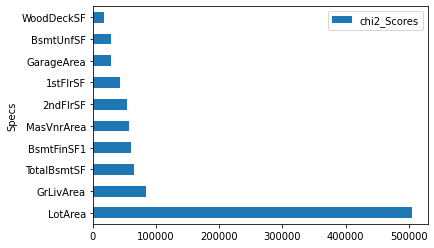

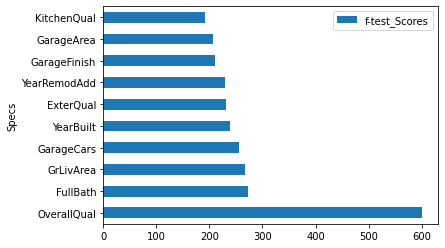

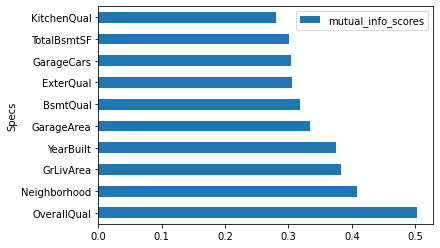

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

##  Selecting Top 10 Best Features using SelectKBest class
kc = SelectKBest(score_func=chi2, k=10)
kf = SelectKBest(score_func=f_classif, k=10)
km = SelectKBest(score_func=mutual_info_classif, k=10)

kc_fit = kc.fit(X,y)
kf_fit = kf.fit(X,y)
km_fit = km.fit(X,y)

kc_scores = pd.DataFrame(kc_fit.scores_)  # Scores of features.
kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(X.columns)

# Combine dataframes ... 
featureScores = pd.concat([X_columns, kc_scores, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Specs', 'chi2_Scores', 'f-test_Scores', 
                         'mutual_info_scores'] 

plt.figure(1, figsize=(10, 20))
for i in range(3):
    # plt.subplot(131+i)
    fs = featureScores.columns[i+1]
    best_features = featureScores.nlargest(10, fs)[['Specs', fs]]
    best_features.plot.barh('Specs');   # pands plot()

In [ ]:
# selected features by Univariate feature selection
X_features_UFS = X[['Neighborhood', 'LotArea', 'OverallQual', 'YearBuilt', 'BsmtQual',
                    'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
                    'KitchenQual', 'GarageCars', 'ExterQual']]

### L1

In [ ]:
# L1-based feature selection
from sklearn.feature_selection import SelectFromModel

logit = LogisticRegression(random_state=1)
logit_model = SelectFromModel(logit).fit(X, y)
X_logit = logit_model.transform(X)
list(X.columns[logit_model.get_support()])

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['MSSubClass',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [ ]:
# selected features by l1
X_features_L1 = X[['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                   'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']]

### Feature Importance

DecisionTree > feature importances : 
 [0.02640833 0.00178509 0.01071833 0.03406752 0.02361095 0.
 0.00351008 0.00779877 0.00403017 0.         0.         0.
 0.0318862  0.         0.         0.         0.         0.20347537
 0.01082571 0.06225998 0.03006224 0.01008798 0.         0.00326417
 0.00482336 0.01020672 0.00511727 0.         0.0049658  0.00277681
 0.00299499 0.         0.         0.00432398 0.03946928 0.
 0.00293419 0.02826652 0.06254011 0.         0.         0.00158675
 0.         0.08268074 0.01650283 0.         0.13806871 0.00232062
 0.00222145 0.         0.00342851 0.         0.00211567 0.
 0.00427897 0.00396876 0.00158675 0.00237993 0.00119006 0.00119006
 0.02915765 0.         0.01377926 0.         0.         0.
 0.0019041  0.00405317 0.0090213  0.00231212 0.         0.
 0.00211576 0.00297515 0.00372886 0.00116802 0.01668635 0.00612661
 0.0038677  0.00737424]


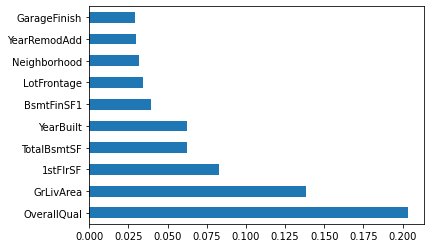

RandomForest > feature importances : 
 [0.01821925 0.01289731 0.00900771 0.02946451 0.03684964 0.00018684
 0.00173066 0.00478239 0.0026829  0.         0.00312191 0.00095376
 0.01688329 0.00353969 0.00036171 0.00394739 0.00829557 0.06175946
 0.00911515 0.04537923 0.03433748 0.00445995 0.00073263 0.00863157
 0.00793362 0.00504617 0.0147279  0.02553192 0.00326593 0.00777436
 0.01479535 0.00265787 0.005573   0.00999934 0.03079702 0.00362972
 0.00352524 0.0185931  0.04781805 0.00052758 0.00833302 0.00163272
 0.00183674 0.04711339 0.02400423 0.00080232 0.0827054  0.00367116
 0.00230497 0.02499749 0.00488363 0.00886013 0.0021574  0.02367484
 0.01821354 0.0031972  0.01516177 0.01561809 0.01467673 0.02939729
 0.01644799 0.02098069 0.03806683 0.00156415 0.0006247  0.00226672
 0.0106429  0.01479504 0.00369551 0.00047003 0.00439444 0.00046599
 0.00057172 0.0042757  0.00056123 0.00097097 0.01115313 0.00889967
 0.00265399 0.00372037]


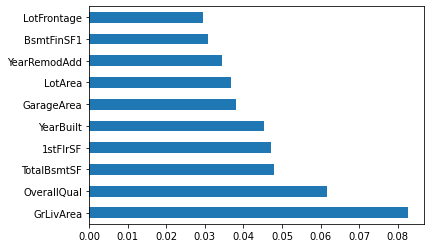

ExtraTrees > feature importances : 
 [0.01146568 0.01394527 0.01263264 0.01905894 0.01697318 0.0002859
 0.00395193 0.01201589 0.00491776 0.         0.00662371 0.00223774
 0.01867396 0.00573474 0.00089683 0.00918543 0.01065264 0.04745526
 0.01082778 0.0226885  0.0346645  0.00991952 0.00109455 0.00941308
 0.00993724 0.01366855 0.01111797 0.02812139 0.00590968 0.01534809
 0.01925729 0.00499784 0.00972515 0.01191159 0.02003882 0.00524374
 0.00406587 0.01310538 0.02500522 0.00092146 0.02093836 0.0064631
 0.00386441 0.02654317 0.01867436 0.00143524 0.03707458 0.01029664
 0.004361   0.02678815 0.01221631 0.01468448 0.00276457 0.0279609
 0.01915857 0.00433565 0.02364573 0.01743325 0.02852675 0.02326176
 0.03062963 0.03233856 0.02770796 0.00348463 0.00168437 0.00401507
 0.01079893 0.01414392 0.00512525 0.00127062 0.0060483  0.0008557
 0.00060581 0.00774028 0.00175427 0.00162669 0.01181855 0.01104876
 0.00568178 0.00750324]


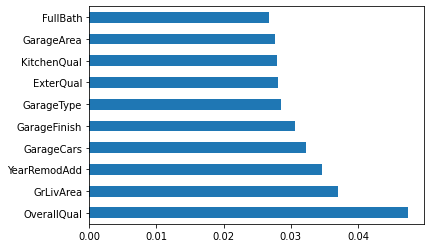

In [ ]:
# Feature Importance
model_fi = [DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=100),
         ExtraTreesClassifier(n_estimators=100)]

model_fi = [model_fi[i].fit(X,y) for i in range(len(model_fi))]

num_chr = [12, 12, 10]
# Use the inbuilt feature_importances_ of tree-based classifiers
# to plot graphs of feature importances for data visualization
for i in range(len(model_fi)):
    print(str(model_fi[i])[:num_chr[i]] + ' > feature importances : \n', 
          model_fi[i].feature_importances_) 
    feat_importances = pd.Series(model_fi[i].feature_importances_, 
                                 index=X.columns)
    feat_importances.nlargest(10).plot.barh()
    # plt.xlim(0, 0.7)
    plt.show()

In [ ]:
# selected features by feature importance
X_features_fi = X[['GrLivArea', 'OverallQual', 'GarageCars', 'YearRemodAdd' , '1stFlrSF',
                'YearBuilt', 'FullBath', 'TotalBsmtSF', 'LotArea', 'GarageArea',
                'BsmtFinSF1', 'KitchenQual']]

### RFE

In [ ]:
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier(random_state=100, n_estimators=50)

rfe_model = RFE(rfc, n_features_to_select = 10, # Select features 
                step = 1)  # step = 1 : remove one at a time
rfe = rfe_model.fit(X, y.astype('int'))
X.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea'],
      dtype='object')

In [ ]:
# selected features by RFE
X_features_RFE = X[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea']]

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5) 
pca.fit(X)
X_features_pca = pd.DataFrame(pca.transform(X))

## [ STEP 5 ] : Machine learning.

In [ ]:
# z-score Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xn = standard_scaler.fit_transform(X_features_pca) # choose selection method

In [ ]:
# Split the dataset with 75% for training data
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(Xn, y, train_size=0.75, test_size=0.25)

# predict
model = [model[i].fit(X1,y1) for i in range(len(model))]
pred  = [model[i].predict(X2) for i in range(len(model))]

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
acc = [accuracy_score(y2, pred[i]) for i in range(len(model))]

num_chr = [10, 10, 12, 12, 12, 10, 10, 12]
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i]) 

GaussianNB: 	 0.49110320284697506
KNeighbors: 	 0.5871886120996441
LogisticRegr: 	 0.6156583629893239
DecisionTree: 	 0.5373665480427047
RandomForest: 	 0.6441281138790036
ExtraTrees: 	 0.6690391459074733
MLPClassif: 	 0.6619217081850534
StackingClas: 	 0.6903914590747331


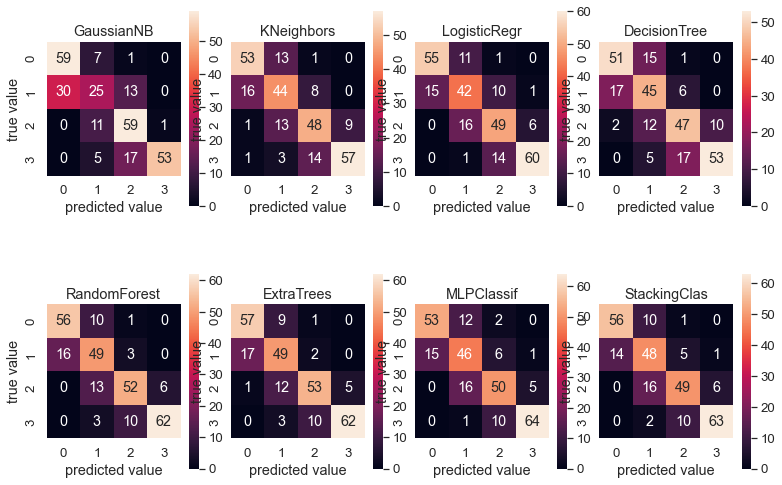

In [ ]:
import seaborn as sns
sns.set()

# Confusion Matrices
n_clf = len(model)
clfs = [str(model[i])[:num_chr[i]] 
                    for i in range(n_clf)]

# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = [confusion_matrix(y2, pred[i]) for i in range(n_clf)]

# Plot the confusion matrix as a color-encoded matrix...
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.35, wspace=0.1)

# plot the confusion matrices
for i in range(n_clf):
    sns.set(font_scale=1.2)
    fig.add_subplot(3, n_clf//2, i + 1, xticks=[], yticks=[])
    sns.heatmap(mat[i], square=True, annot=True, cbar=True)
    plt.ylim(4, 0)
    plt.title(clfs[i])
    plt.xlabel('predicted value')
    plt.ylabel('true value');